# lec 7. Typical scikit-learn Workflow

# Introductionto Scikti-Learn (sklearrn)

This notebook demonstarate some of the most useful functions of the beatutiful Sckiit-Learn Library


What we're going to cover

0. An end to end Skicit-Learn woirkflow

1. Getting the data raedy

2. Choose the right/algotritm and use it to make predictions on our data

3. Fit the model/Alogoritm and use it to make prediction on our data

4. Evaluating a model

5. Improve a model

6. Save and load a trained model

7. Putting all together


In [11]:
# importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit- Learn Workflow

In [4]:
# 1. Get the data ready 

import pandas as pd

heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Now our target is to use the data of each columns to predict the target value

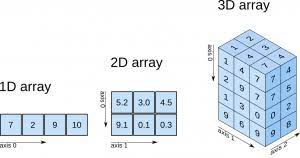
Review to axes int matrix

In [5]:
# create X (features matrix)
X = heart_disease.drop("target", axis=1) # selecting by droping cloumns

# create Y (label Vector)

Y = heart_disease["target"]

In [6]:
# 2. Choose the right model and hyperparameters
# import Random Forest Model class from sklearn's ensemble module

from sklearn.ensemble import RandomForestClassifier

# now we instantiate this RandomForest Class

clf= RandomForestClassifier(n_estimators=100) #we setting the hyper Prameter n_estimators to 100

# We'll keep the defualt hyperparameters
clf.get_params() #we can see the parameter what this Model is using

# Review : to access atributes only use . and name and to use fuction use .name()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model  to the data

# now we've to split our data into tain and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# it means the size of test set is 20% of the data

In [8]:
# Now we are fitting our data into algorithm to find patterns

clf.fit(X_train, Y_train)

RandomForestClassifier()

In [9]:
# Make a prediction

y_label= clf.predict(np.array([0,2,3,4])) # this will give us errors becuase
#our input data is not similar to the data on which model trained on

C:\Users\ay569\Downloads\ML_Data_Analysis\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Now Making the prediction on our test data

y_preds= clf.predict(X_test)

In [ ]:
Y_test

In [ ]:
# 4. Evaluate  the  model on the training data and test data

# here 1 means model got accurate 100 % on training data 
clf.score(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test) # it tells the means error in our pridiction

Here our model is 73 % accurate on our test data becuase if never seen the test data and also the lables

In [ ]:
# here  we trying to evaluating our model on some more mectrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,y_preds)) # it takes actual labels vs precicted labels

In [ ]:
confusion_matrix(Y_test, y_preds)

In [ ]:
accuracy_score(Y_test, y_preds)

In [ ]:
# 5. Improve a model

# Try different amout of n_estimators

np.random.seed(42)
# here we're trying to guess the n_estimators using random numbers
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf= RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model acurracy on test set : {clf.score(X_test, Y_test) * 100: .5f}%") # print upto 2 decimal places
    maxi=1e-5
    print(" ")

Here we get the max accuracy of 83% from 73% by adjusting one of our hyperparameters n estimators

In [ ]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb")) # wb meaning write binary

In [ ]:
loaded_model= pickle.load(open("random_forest_model_1.pk1", "rb")) #rb -> read binary

# checking the accuracy of saved model
loaded_model.score(X_test,Y_test)

# Lec 8 Debugging warnig in Jupyter Notebook

In [ ]:
# we can ignore all the warinigs by this method

import warnings
warnings.filterwarnings("ignore") # this solution is not recommeded
# type "default" in place of ignore to set it back to defualt

above we're getting the warnig related to the hyperparameter diferrnce in different versions

In [ ]:
# getting version of scikit learn

import sklearn

sklearn.show_versions()

### How do we upgrade the package in the conda env


conda activate your_env_name

conda list (show all the packages we're getting)

conda update scikit-learn (this will upgrade the version of scikit learn)

conda list scikit-learn (show the version  of sckit learn)

conda search scikit-learn (this will show what version are available for sckit-learn for conda)

conda search sci-learn --info (output with bit more info)

conda list python (to check wheather your python version is compatible or not)



### Reinstalling some of the dependencies

like numpy and pythons reinstall them with specific verion numbers

conda uninstall sckit-learn python (for unistalling dependencise) it will also unistall numpy and pandas because they are depend on python

conda install python=3.6.9 scikit-learn=0.22 matplotlib numpy jupyter notebook (to reinstall all the dependencies) back

Now check again all the version of all dependencies and re run your notebook

# Introductionto Scikti-Learn (sklearrn)

In [19]:
# This notebook demonstarate some of the most useful functions of the beatutiful Sckiit-Learn Library

# lets Listify the content

What_were_going_to_cover=[

"0. An end to end Skicit-Learn woirkflow",

"1. Getting the data raedy",

"2. Choose the right/algotritm and use it to make predictions on our data",

"3. Fit the model/Alogoritm and use it to make prediction on our data",

"4. Evaluating a model",

"5. Improve a model",

"6. Save and load a trained model",

"7. Putting all together"]

In [20]:
What_were_going_to_cover

['0. An end to end Skicit-Learn woirkflow',
 '1. Getting the data raedy',
 '2. Choose the right/algotritm and use it to make predictions on our data',
 '3. Fit the model/Alogoritm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting all together']

# Lec 9. Getting Your Data Ready Splitting Your Data

## 1. Getting data ready to be used with machine learning

Three main things we have to do:

    1. Spliting data inot features and labels (usually 'X' and 'Y')
    2. Filling (also called imputing) or disregarding missing values
    3. converting non- numerical values to numerical values (also called fearure encoding)

In [12]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
Y=heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [17]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [22]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
X.shape[0] *0.8

242.4

In [26]:
242 + 61

303

In [24]:
len(heart_disease)

303

# Lec 10. Quick Tip Clean, Transform, Reduce

Steps we' re going to do in next couple of lecs 

Clean Data -> Transform Data -> Reduce Data


Why do we need to clean our data?

Ans. sometime the data we get is not always complete it consist some missing values, missing lables, it will not going to allow us in building machine learning models so we usually remove the column which has missing value, label or we can fill that with some sort of mean like in example of house holds prices, we might notice some outlier that we should remove.

Why Data transformation?

Ans. The machine learning models not usually good with handling text or images because they don't understand them they only undersatand numbers so we need to transform our data into number so that we can feed it to our machine learning model

What is the need of reducing data ?

Ans. More data is usually good but the more data we have it require us more computaion power to compute and process that data so if we get the same result by using less amount of data it will save the companies money, some time data reduction also results in dimensionality reduction or column reduction so we can remove some columns which are irrelevant and won't be needed to for our machine learning model.

# Lec 11. Getting Your Data Ready Convert Data To Numbers

### 1.1 make sure our data is all numerical

In [51]:
car_sales= pd.read_csv("car-sales-extended.csv")
car_sales.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [29]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### Trying without converting our data into nummbers

In [33]:
# Split int X/y

X=car_sales.drop("Price", axis =1)
y= car_sales["Price"]

# Spit into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Build machine learnig model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# we're going to getting error 

ValueError: could not convert string to float: 'Toyota'

In [37]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [39]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


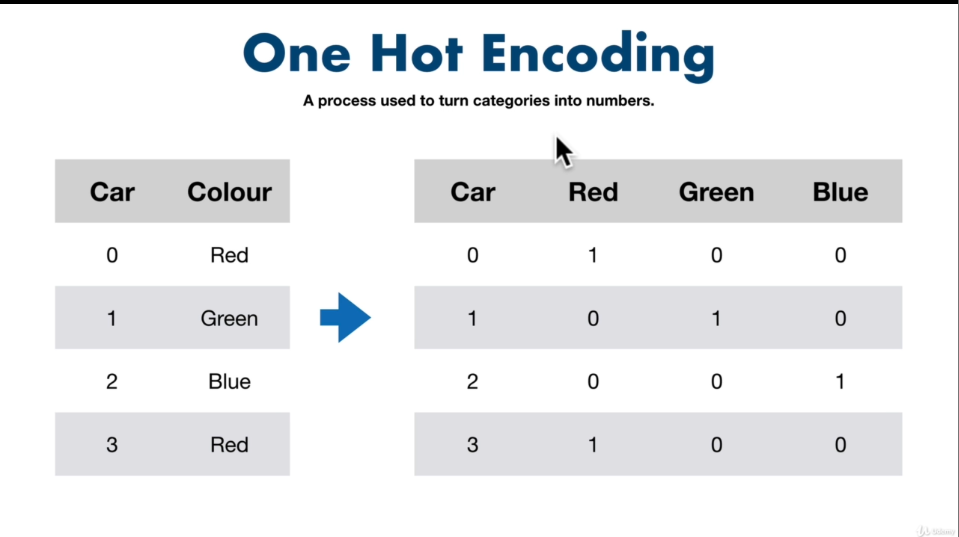

In [47]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
# interpretaion of above code is -> hey column transformer take the one hot
# incoder and apply it the categorical features for the remainder of the column
# that you find passthough don't do any thing to that

transformed_X = transformer.fit_transform(X) # fitting our transformer to our X data
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [49]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [50]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [53]:
# Second way using Pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head(10)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
5,4,0,1,0,0,0,0,0,1,0
6,4,0,0,0,1,0,1,0,0,0
7,4,0,1,0,0,0,0,0,0,1
8,4,0,0,1,0,0,0,0,0,1
9,4,0,1,0,0,0,1,0,0,0


In [55]:
# Let's refit the data

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
model.score(X_test, y_test)

0.3235867221569877